In [6]:
# Jeff
# ROOT_LABEL = "/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling"
# OUR_DATASET_IMGS = f"{ROOT_LABEL}"
# OUR_DATASET_BND_TEXT = f"{ROOT_LABEL}/detection/text"

#Jieshan
ROOT_LABEL = "/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2"
OUR_DATASET_IMGS = f"{ROOT_LABEL}/jeff_images_w_ori_path"
OUR_DATASET_BND_TEXT = f"{ROOT_LABEL}/detection/all_text"

In [7]:
import os
import json
import numpy as np

from PIL import Image
import cv2 
from IPython.display import display, clear_output
from glob import glob

In [3]:
color = (255,0,0)
f_all_text_phs = glob(f"{OUR_DATASET_BND_TEXT}/*_all_text_ph.json")
f_subimg_text_phs = glob(f"{OUR_DATASET_BND_TEXT}/*_subimg_text_ph.json")
image_names = [f_name.replace("_subimg_text_ph.json", "").split("/")[-1] for f_name in f_subimg_text_phs]
print(len(image_names), len(f_all_text_phs), len(f_subimg_text_phs))

905 905 905


In [4]:
f_images = [f"{OUR_DATASET_IMGS}/{f_name}" for f_name in image_names if os.path.exists(f"{OUR_DATASET_IMGS}/{f_name}")]
print(len(f_images), f_images[0], f_subimg_text_phs[0])

905 /data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/sg.bigo.live_6_5.png /data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/detection/all_text/sg.bigo.live_6_5.png_subimg_text_ph.json


/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/fm.castbox.audiobook.radio.podcast_2_2.png

## Extract text:  Hide my location


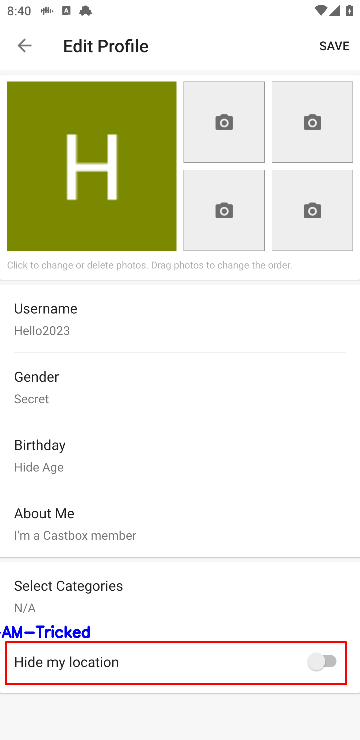

/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/sg.bigo.live_12_5.png

## Extract text:   x160 31 Day Recharge 160 diamonds  02 : 00 : 40 0/160

## Extract text:   02 : 00 : 40


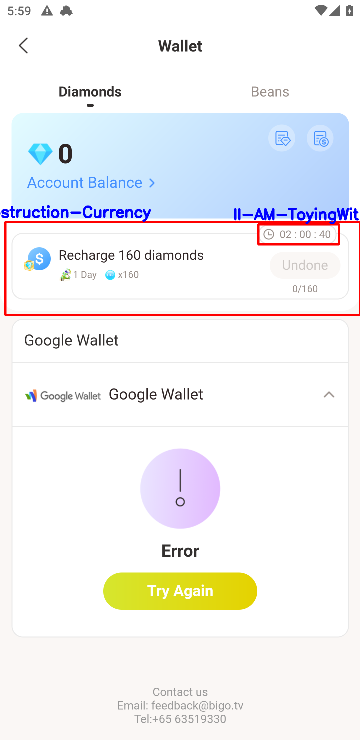

/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/sg.bigo.live_53_step-36--g0a89-1693729214557.png

## Extract text:  Tip: Invite friends to earn up to $200 !


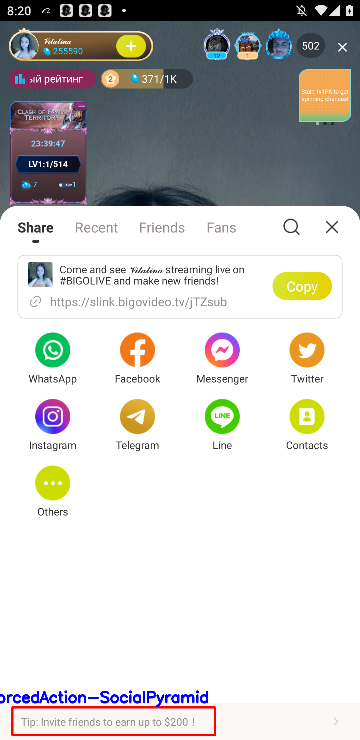

/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/deezer.android.app1_25_step-36--g0a149-1694571983137.png

## Extract text:  Offline Mode


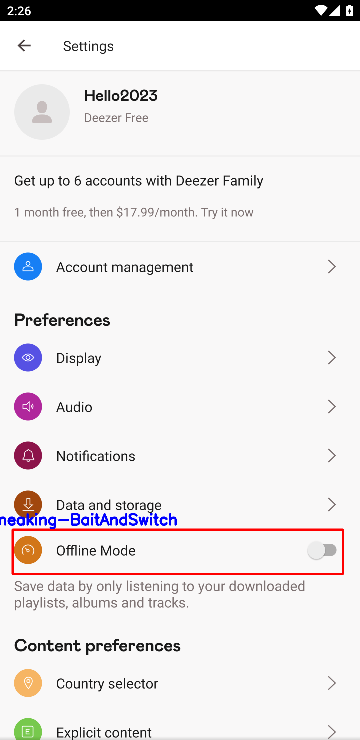

/data/scsgpu1/work/jeffwang/dark_pattern/our_labelling_v2/jeff_images_w_ori_path/com.zumobi.msnbc_11_step-188--g0a36-1694471721058.png

## Extract text:  

## Extract text:  TOTAL Adblock Start Now Turn Off All Ads Faster Browsing With No Ads!

## Extract text:  TOTAL Adblock Start Now Turn Off All Ads Faster Browsing With No Ads!


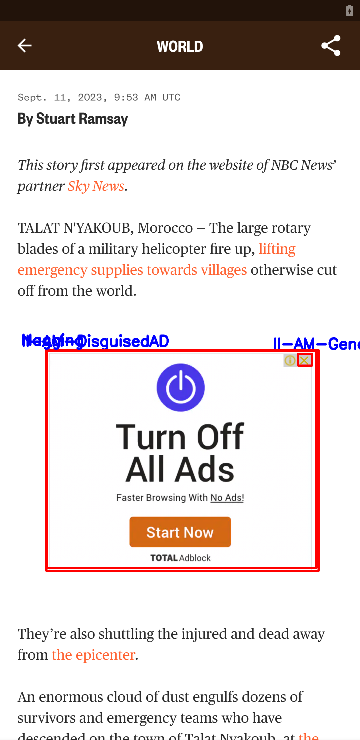

KeyboardInterrupt: Interrupted by user

In [12]:
assert len(f_images) == len(f_subimg_text_phs)

n_loop = 5
for f_img, f_bnd_text in zip(f_images, f_subimg_text_phs):
    
    print(f_img)
    \
    
    img = cv2.imread(f_img)
    with open(f_bnd_text, 'r') as f:
        img_texts_bnds = json.load(f)
        for bnd, text, labels in img_texts_bnds:
            left = int(bnd[0][0])
            top = int(bnd[0][1])
            right = int(bnd[1][0])
            bottom = int(bnd[-1][-1])
            imgHeight, imgWidth, _ = img.shape
            thick = int((imgHeight + imgWidth) // 500)

            print("\n## Extract text: ", text)
            labels = ' '.join(labels)
            cv2.rectangle(img, (left, top), (right, bottom), color, thick)
            cv2.putText(img, labels, (left-100, top-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), thick)

        imS = cv2.resize(img, (round(img.shape[1]*0.25), round(img.shape[0]*0.25)))   
        display(Image.fromarray(imS))
    n_loop = n_loop - 1

    if n_loop == 0:
        input(f"{n_loop} Press Enter to continue...")
        n_loop = 5
        clear_output(wait=True)
        